In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Đọc dữ liệu từ 2 file
file1 = '/kaggle/input/car-cs114/stat_dataset/CarDataset-1.csv'
file2 = '/kaggle/input/car-cs114/stat_dataset/CarDataset-2.csv'
file3 = '/kaggle/input/car-cs114/car_split/car_split/CarDataset.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

In [6]:
brand_colors = {
    'Honda': 'red',
    'Hyundai': 'blue',
    'KIA': 'green',
    'Mazda': 'purple',
    'Mitsubishi': 'orange',
    'Others': 'gray',
    'Suzuki': 'skyblue',
    'Toyota': 'brown',
    'VinFast': 'gold'
}

In [4]:
#Tổng số ảnh theo từng hãng xe
brand_map = {
    0: 'Others',
    1: 'Honda',
    2: 'Hyundai',
    3: 'KIA',
    4: 'Mazda',
    5: 'Mitsubishi',
    6: 'Suzuki',
    7: 'Toyota',
    8: 'VinFast'
}

brand_counts = df3.groupby('CategoryID').size().reset_index(name='Số lượng')
brand_counts['Hiệu xe'] = brand_counts['CategoryID'].replace(brand_map)
brand_counts = brand_counts[['Hiệu xe', 'Số lượng']]

print("Tổng số ảnh theo từng hãng xe:\n")
brand_counts

Tổng số ảnh theo từng hãng xe:



,Hiệu xe,Số lượng
0,Others,4262
1,Honda,3279
2,Hyundai,3530
3,KIA,3414
4,Mazda,3325
5,Mitsubishi,3019
6,Suzuki,6842
7,Toyota,6092
8,VinFast,2974


<Figure size 800x500 with 0 Axes>

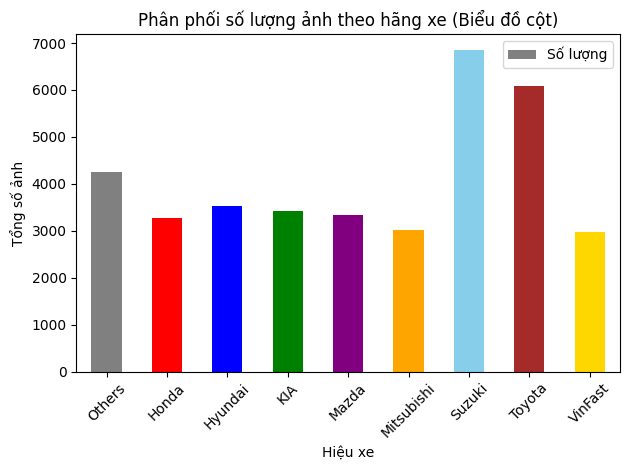

<Figure size 500x500 with 0 Axes>

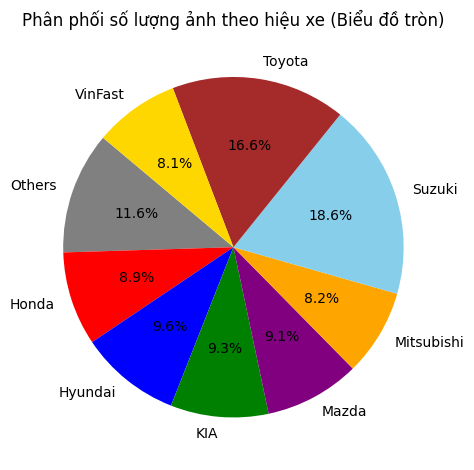

In [10]:
# ====== Biểu đồ Cột ======
plt.figure(figsize=(8, 5))
brand_counts.plot(kind='bar', 
                  x='Hiệu xe', 
                  y='Số lượng', 
                  color=[brand_colors.get(brand, 'skyblue') for brand in brand_counts['Hiệu xe']])
plt.xlabel('Hiệu xe')
plt.ylabel('Tổng số ảnh')
plt.title('Phân phối số lượng ảnh theo hãng xe (Biểu đồ cột)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ====== Biểu đồ Tròn ======
plt.figure(figsize=(5, 5))
brand_counts.set_index('Hiệu xe').plot(kind='pie', 
                                        y='Số lượng',
                                        autopct='%1.1f%%', 
                                        colors=[brand_colors.get(brand, 'skyblue') for brand in brand_counts['Hiệu xe']], 
                                        startangle=140, legend=False)
plt.ylabel('')  # Loại bỏ nhãn trục y
plt.title('Phân phối số lượng ảnh theo hiệu xe (Biểu đồ tròn)')
plt.tight_layout()
plt.show()

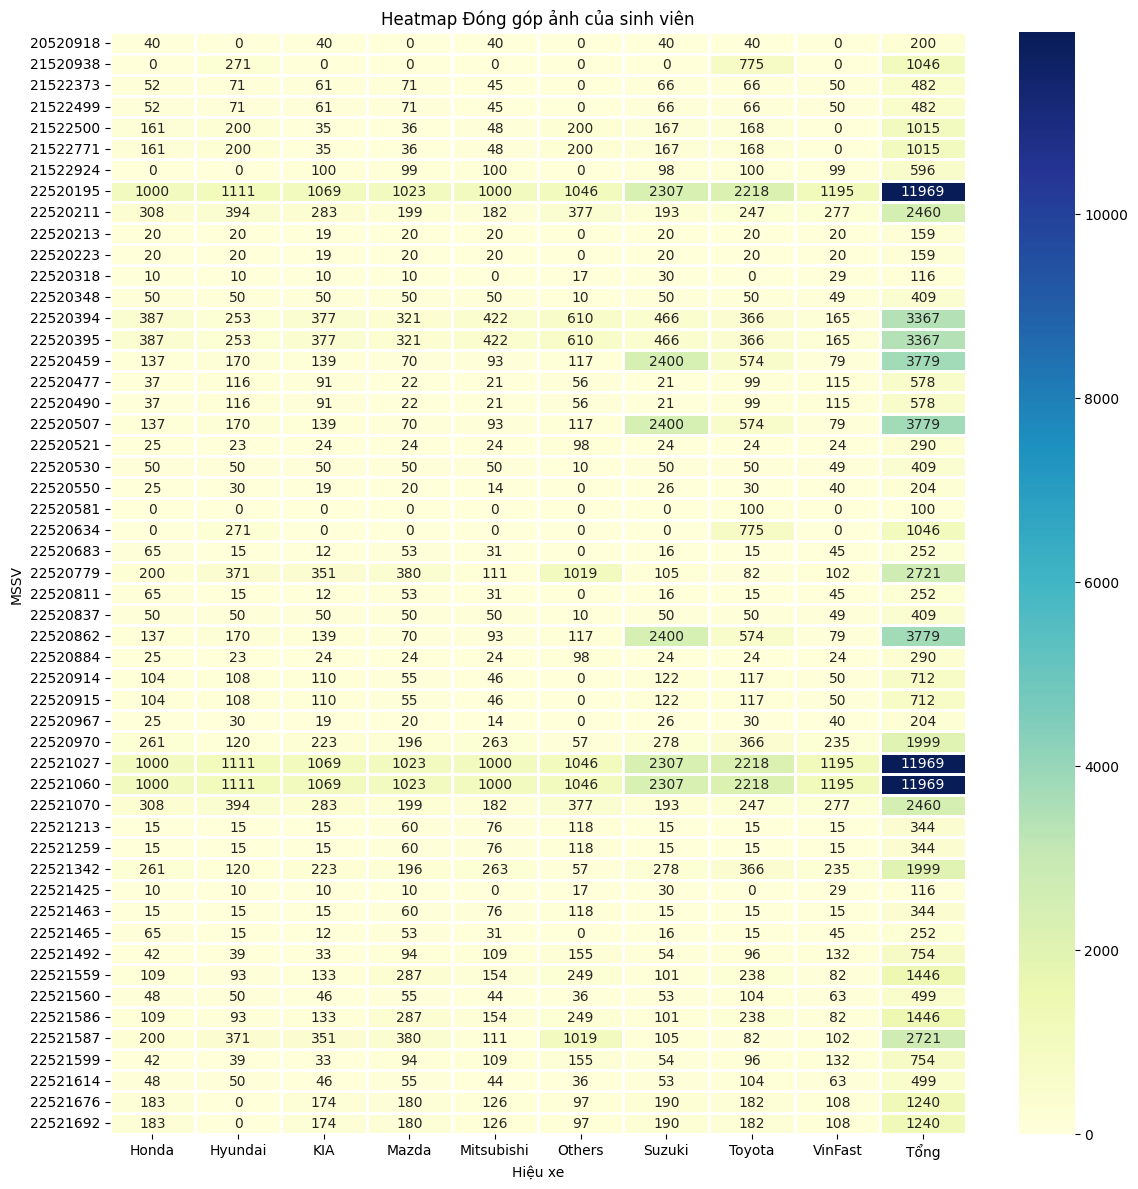

In [36]:
# Tạo bảng tổng hợp số lượng ảnh theo MSSV và hãng xe
heatmap_data = df2.pivot_table(index='MSSV', columns='Hiệu xe', values='Số lượng', aggfunc='sum', fill_value=0)

# Thêm cột 'Tổng' tính tổng số ảnh mỗi MSSV đóng góp
heatmap_data['Tổng'] = heatmap_data.sum(axis=1)

plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.75)
plt.title('Heatmap Đóng góp ảnh của sinh viên')
plt.xlabel('Hiệu xe')
plt.ylabel('MSSV')
plt.tight_layout()
plt.show()

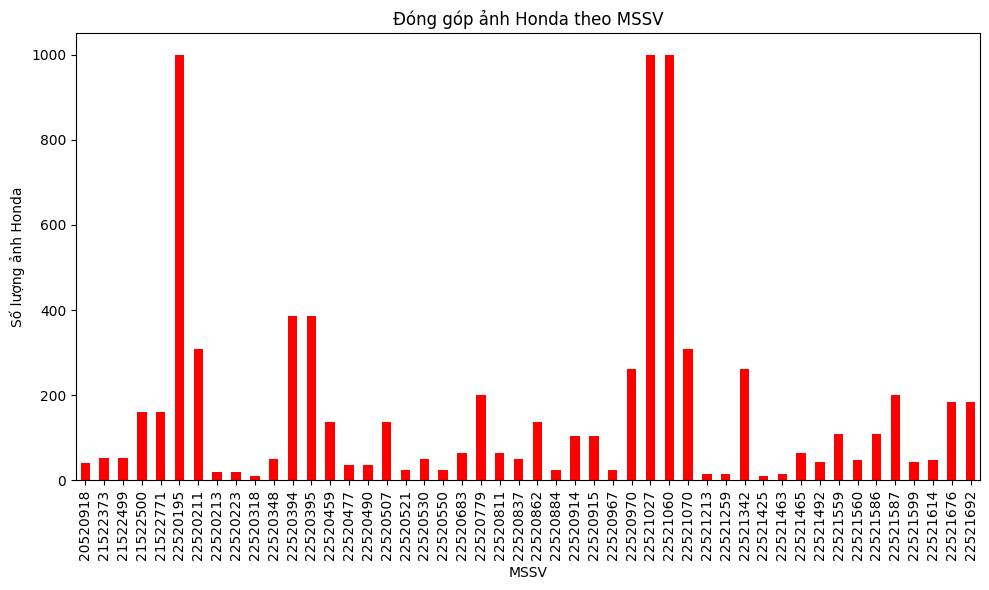

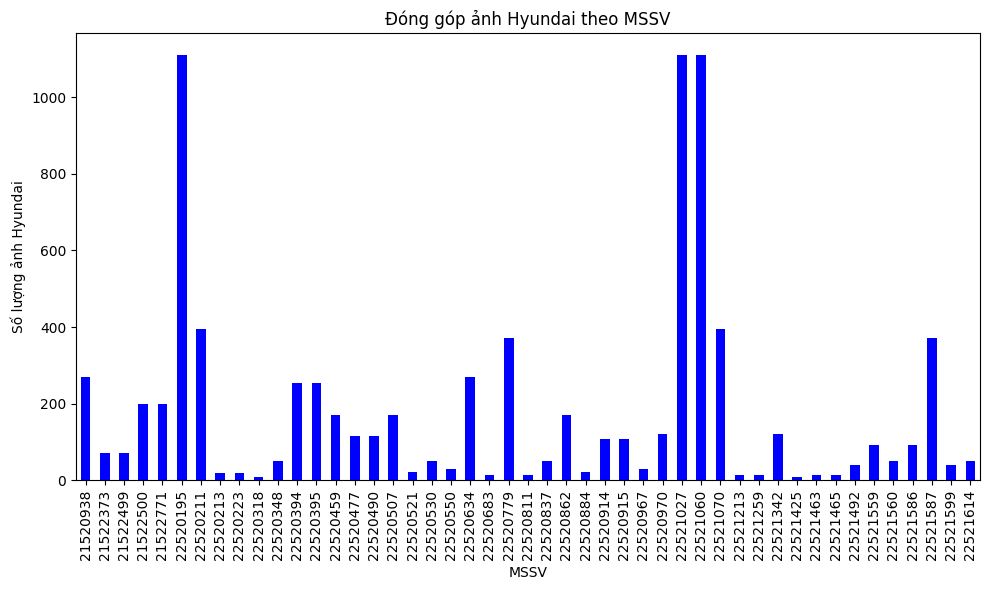

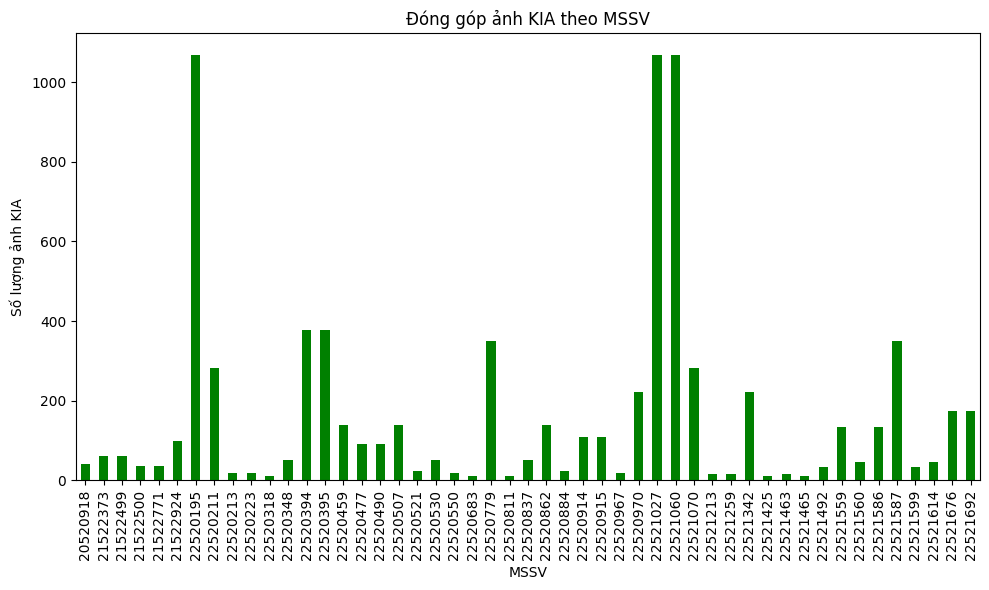

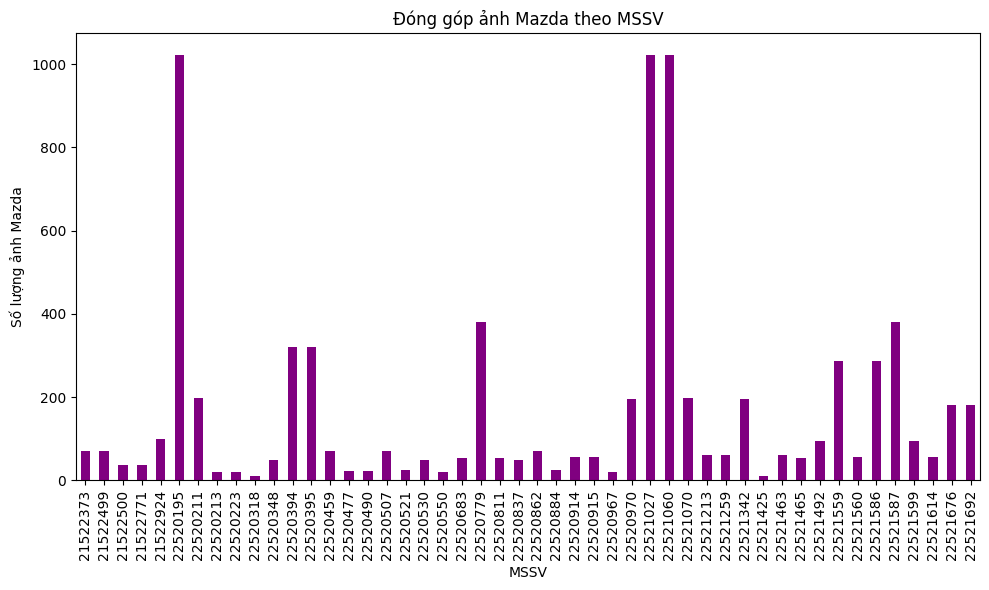

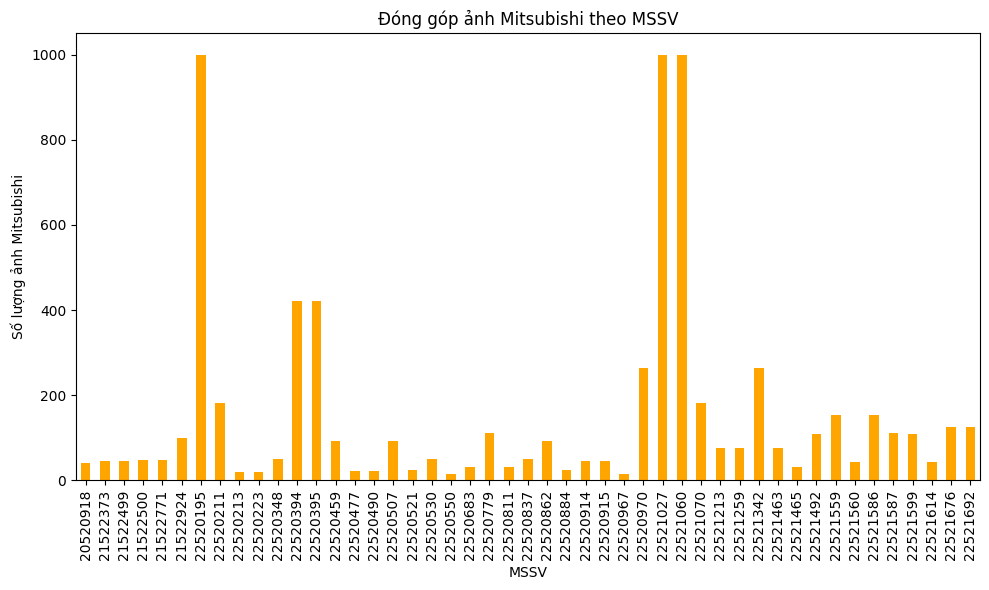

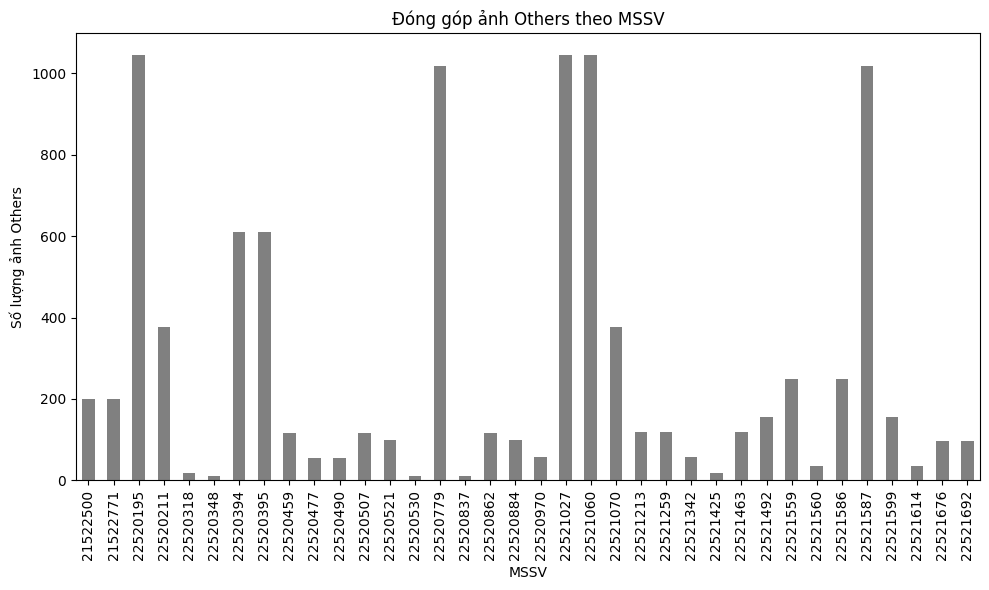

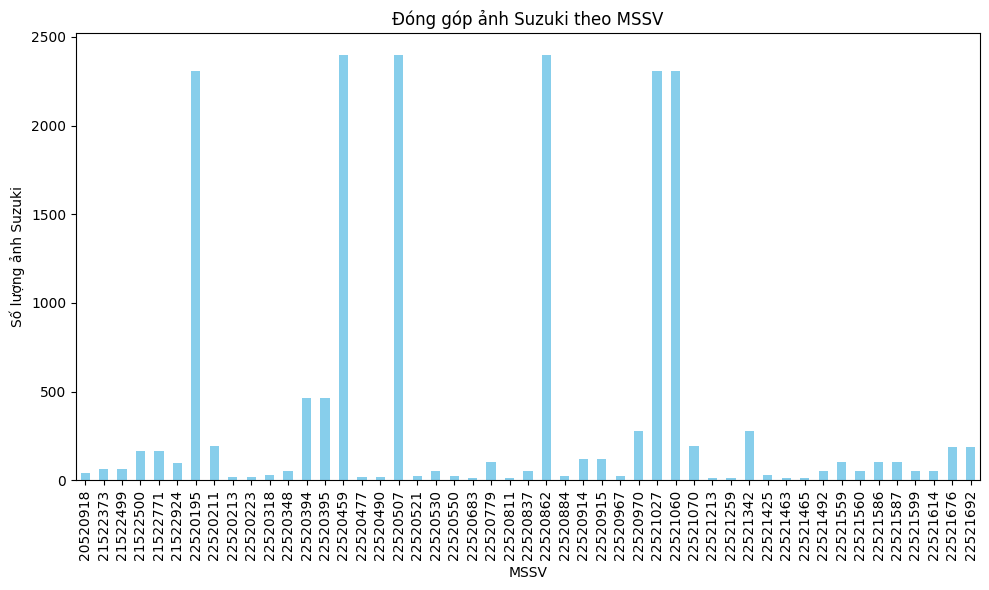

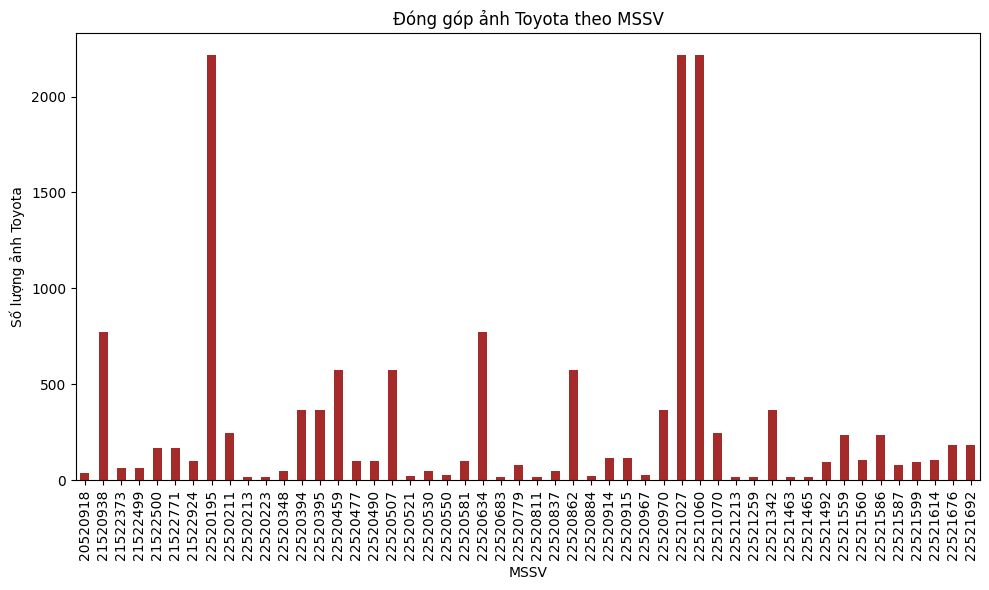

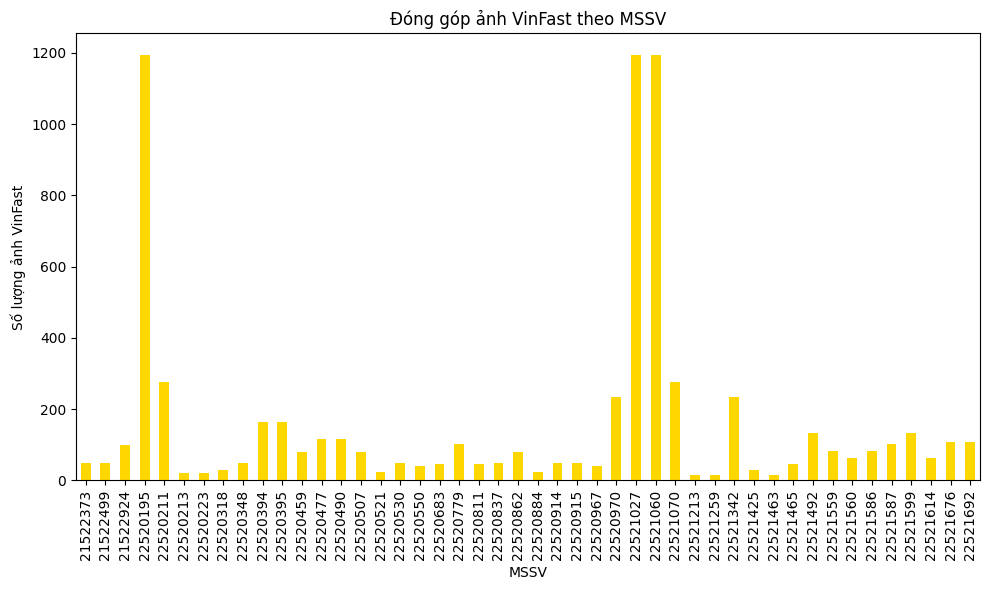

In [19]:
# Vẽ biểu đồ cho từng hãng xe với màu sắc riêng biệt
for brand, color in brand_colors.items():
    # Lọc dữ liệu theo hãng xe
    brand_contributions = df2[df2['Hiệu xe'] == brand].groupby('MSSV')['Số lượng'].sum()
    
    # Kiểm tra nếu có dữ liệu
    if not brand_contributions.empty:
        plt.figure(figsize=(10, 6))
        brand_contributions.plot(kind='bar', color=color)
        plt.xlabel('MSSV')
        plt.ylabel(f'Số lượng ảnh {brand}')
        plt.title(f'Đóng góp ảnh {brand} theo MSSV')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Không có dữ liệu cho hãng xe {brand}")

In [37]:
from tabulate import tabulate

# ====== Thống kê toàn bộ ======
max_total = df1['Số lượng'].max()
min_total = df1['Số lượng'].min()

max_total_contributors = df1[df1['Số lượng'] == max_total]
min_total_contributors = df1[df1['Số lượng'] == min_total]

# Tổng hợp dữ liệu toàn bộ vào bảng
overall_stats = [
    ["Nhiều nhất", max_total, ', '.join(max_total_contributors['MSSV'].astype(str))],
    ["Ít nhất", min_total, ', '.join(min_total_contributors['MSSV'].astype(str))]
]

print("\n==== ĐÓNG GÓP TOÀN BỘ ====")
print(tabulate(overall_stats, headers=["Loại", "Số lượng ảnh", "Danh sách MSSV"], tablefmt="fancy_grid"))

# ====== Thống kê theo từng hãng xe ======
brands = df2['Hiệu xe'].unique()

for brand in brands:
    brand_df = df2[df2['Hiệu xe'] == brand]
    
    max_brand = brand_df['Số lượng'].max()
    min_brand = brand_df['Số lượng'].min()
    
    max_brand_contributors = brand_df[brand_df['Số lượng'] == max_brand]
    min_brand_contributors = brand_df[brand_df['Số lượng'] == min_brand]
    
    # Tổng hợp dữ liệu theo hãng xe vào bảng
    brand_stats = [
        ["Nhiều nhất", max_brand, ', '.join(max_brand_contributors['MSSV'].astype(str))],
        ["Ít nhất", min_brand, ', '.join(min_brand_contributors['MSSV'].astype(str))]
    ]
    
    print(f"\n==== ĐÓNG GÓP CHO HÃNG {brand.upper()} ====")
    print(tabulate(brand_stats, headers=["Loại", "Số lượng ảnh", "Danh sách MSSV"], tablefmt="fancy_grid"))



==== ĐÓNG GÓP TOÀN BỘ ====
╒════════════╤════════════════╤══════════════════════════════╕
│ Loại       │   Số lượng ảnh │ Danh sách MSSV               │
╞════════════╪════════════════╪══════════════════════════════╡
│ Nhiều nhất │          11969 │ 22521027, 22520195, 22521060 │
├────────────┼────────────────┼──────────────────────────────┤
│ Ít nhất    │            100 │ 22520581                     │
╘════════════╧════════════════╧══════════════════════════════╛

==== ĐÓNG GÓP CHO HÃNG HONDA ====
╒════════════╤════════════════╤══════════════════════════════╕
│ Loại       │   Số lượng ảnh │ Danh sách MSSV               │
╞════════════╪════════════════╪══════════════════════════════╡
│ Nhiều nhất │           1000 │ 22521027, 22520195, 22521060 │
├────────────┼────────────────┼──────────────────────────────┤
│ Ít nhất    │             10 │ 22521425, 22520318           │
╘════════════╧════════════════╧══════════════════════════════╛

==== ĐÓNG GÓP CHO HÃNG HYUNDAI ====
╒════════════╤════


==== ĐÓNG GÓP TOÀN BỘ ====
╒═════════════════╤════════════════╕
│ Loại thống kê   │   Số lượng ảnh │
╞═════════════════╪════════════════╡
│ Nhiều nhất      │          11969 │
├─────────────────┼────────────────┤
│ Ít nhất         │            100 │
├─────────────────┼────────────────┤
│ Trung bình      │           6034 │
├─────────────────┼────────────────┤
│ Chênh lệch      │          11869 │
╘═════════════════╧════════════════╛

==== ĐÓNG GÓP CHO HÃNG HONDA ====
╒═════════════════╤════════════════╕
│ Loại thống kê   │   Số lượng ảnh │
╞═════════════════╪════════════════╡
│ Nhiều nhất      │           1000 │
├─────────────────┼────────────────┤
│ Ít nhất         │             10 │
├─────────────────┼────────────────┤
│ Trung bình      │            505 │
├─────────────────┼────────────────┤
│ Chênh lệch      │            990 │
╘═════════════════╧════════════════╛

==== ĐÓNG GÓP CHO HÃNG HYUNDAI ====
╒═════════════════╤════════════════╕
│ Loại thống kê   │   Số lượng ảnh │
╞═══════════

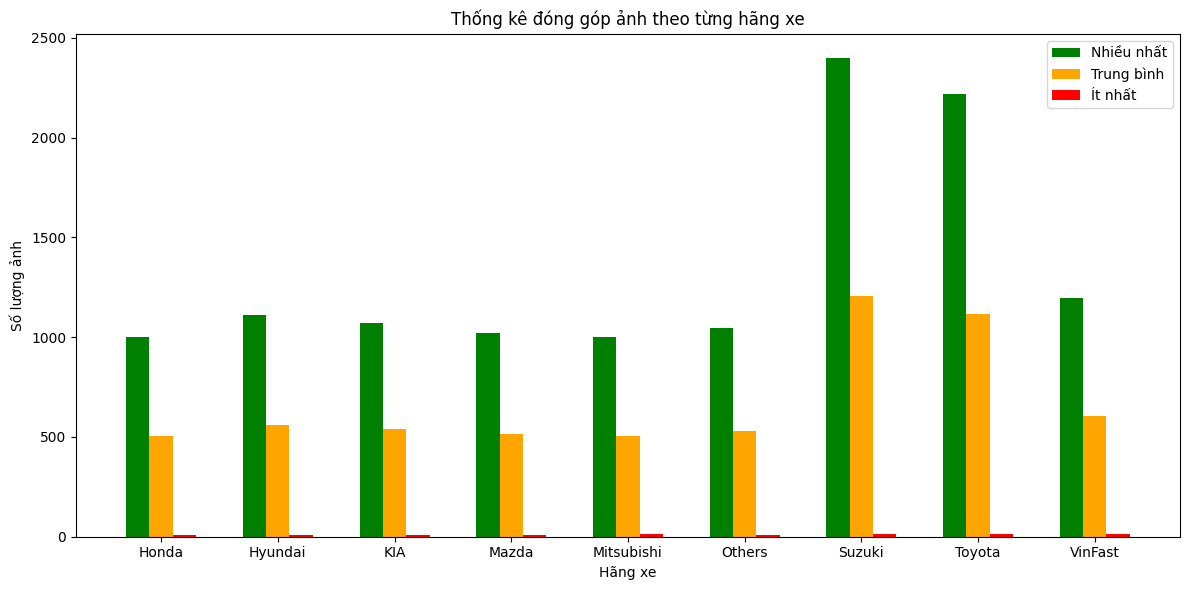

In [38]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# ====== Thống kê toàn bộ ======
max_total = df1['Số lượng'].max()
min_total = df1['Số lượng'].min()
mean_total = (max_total + min_total) // 2
diff_total = max_total - min_total

# Tổng hợp dữ liệu vào bảng
overall_stats = [
    ["Nhiều nhất", max_total],
    ["Ít nhất", min_total],
    ["Trung bình", mean_total],
    ["Chênh lệch", diff_total]
]

print("\n==== ĐÓNG GÓP TOÀN BỘ ====")
print(tabulate(overall_stats, headers=["Loại thống kê", "Số lượng ảnh"], tablefmt="fancy_grid"))

# ====== Thống kê theo từng hãng xe ======
brands = df2['Hiệu xe'].unique()

# Danh sách dữ liệu cho biểu đồ
brand_names = []
max_values = []
min_values = []
mean_values = []

for brand in brands:
    brand_df = df2[df2['Hiệu xe'] == brand]
    
    max_brand = brand_df['Số lượng'].max()
    min_brand = brand_df['Số lượng'].min()
    mean_brand = (max_brand + min_brand) // 2
    diff_brand = max_brand - min_brand

    # Thêm dữ liệu vào bảng
    brand_stats = [
        ["Nhiều nhất", max_brand],
        ["Ít nhất", min_brand],
        ["Trung bình", mean_brand],
        ["Chênh lệch", diff_brand]
    ]
    
    print(f"\n==== ĐÓNG GÓP CHO HÃNG {brand.upper()} ====")
    print(tabulate(brand_stats, headers=["Loại thống kê", "Số lượng ảnh"], tablefmt="fancy_grid"))

    # Lưu dữ liệu để vẽ biểu đồ
    brand_names.append(brand)
    max_values.append(max_brand)
    min_values.append(min_brand)
    mean_values.append(mean_brand)

# ====== Vẽ biểu đồ trực quan ======
x = range(len(brand_names))

plt.figure(figsize=(12, 6))
plt.bar(x, max_values, width=0.2, label='Nhiều nhất', color='green')
plt.bar([i + 0.2 for i in x], mean_values, width=0.2, label='Trung bình', color='orange')
plt.bar([i + 0.4 for i in x], min_values, width=0.2, label='Ít nhất', color='red')

plt.xlabel('Hãng xe')
plt.ylabel('Số lượng ảnh')
plt.title('Thống kê đóng góp ảnh theo từng hãng xe')
plt.xticks([i + 0.2 for i in x], brand_names)
plt.legend()
plt.tight_layout()
plt.show()


## Ảnh có tên không hợp lệ

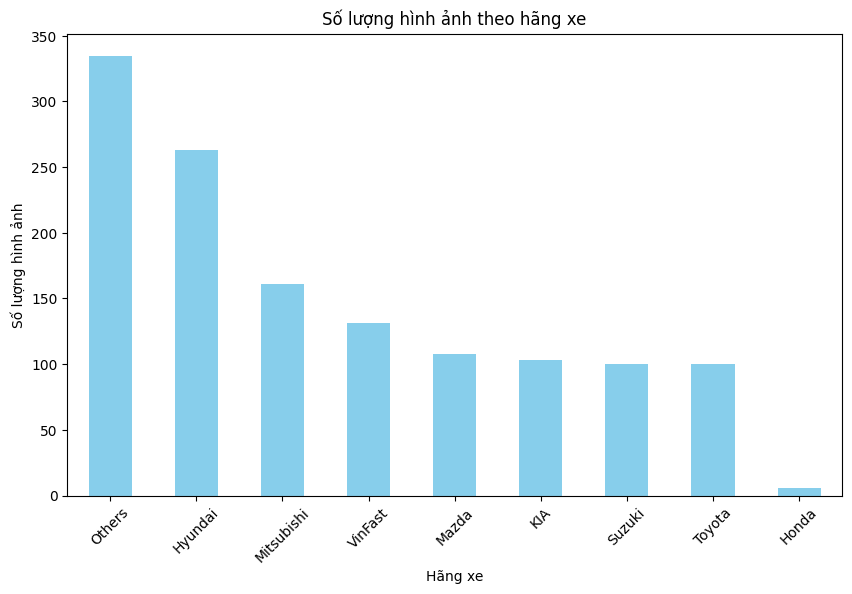

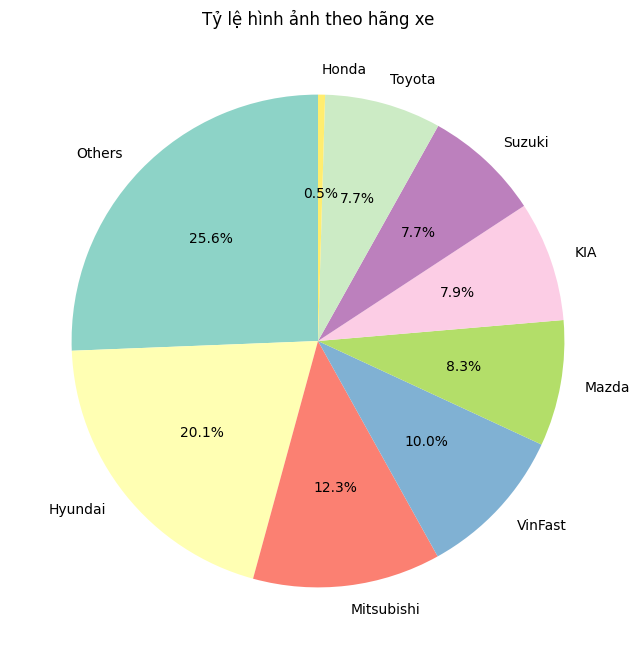

In [39]:
# Đọc dữ liệu từ file CSV
df3 = pd.read_csv('/kaggle/input/car-cs114/stat_dataset/InvalidNames.csv')

# Tạo dictionary để ánh xạ CategoryID thành tên hãng xe
brand_map = {
    0: 'Others',
    1: 'Honda',
    2: 'Hyundai',
    3: 'KIA',
    4: 'Mazda',
    5: 'Mitsubishi',
    6: 'Suzuki',
    7: 'Toyota',
    8: 'VinFast'
}

# Ánh xạ CategoryID thành tên hãng xe và tạo cột 'Brand'
df3['Brand'] = df3['CategoryID'].map(brand_map)

# Thống kê số lượng hình ảnh theo từng hãng xe
brand_counts = df3['Brand'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng hình ảnh theo hãng xe')
plt.xlabel('Hãng xe')
plt.ylabel('Số lượng hình ảnh')
plt.xticks(rotation=45)
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
brand_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Tỷ lệ hình ảnh theo hãng xe')
plt.ylabel('')  # Ẩn nhãn y
plt.show()

## Ảnh không mở được

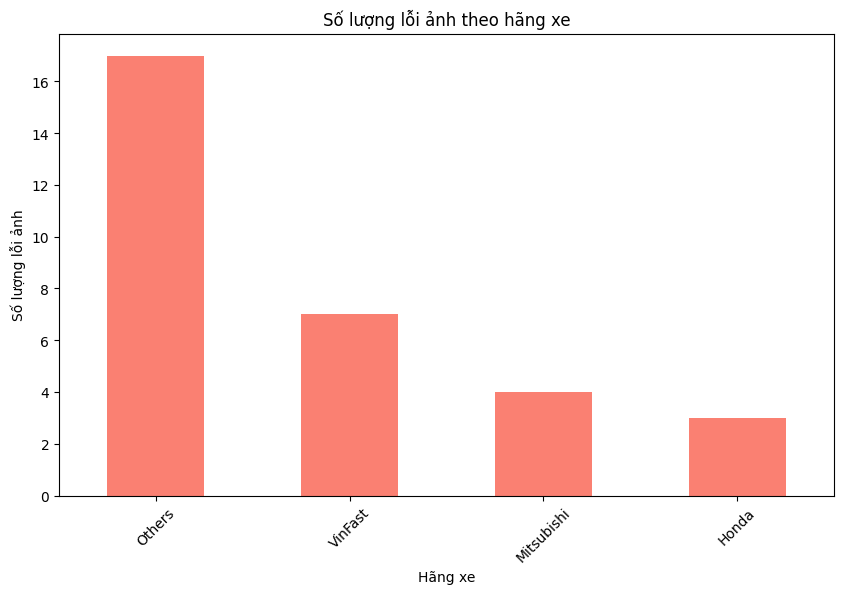

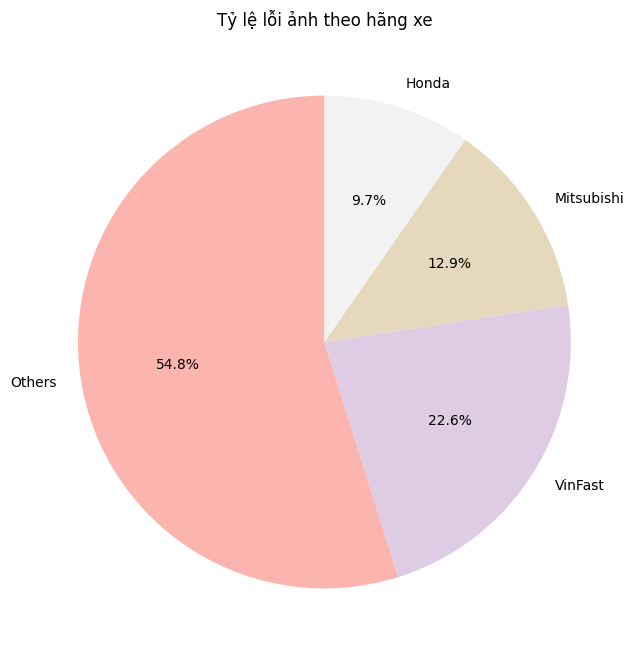

In [40]:
# Đọc dữ liệu từ file CSV
df_errors = pd.read_csv('/kaggle/input/car-cs114/ImageErrors.csv')

# Ánh xạ CategoryID thành tên hãng xe và tạo cột 'Brand'
df_errors['Brand'] = df_errors['CategoryID'].map(brand_map)

# Thống kê số lượng lỗi ảnh theo từng hãng xe
brand_counts_errors = df_errors['Brand'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
brand_counts_errors.plot(kind='bar', color='salmon')
plt.title('Số lượng lỗi ảnh theo hãng xe')
plt.xlabel('Hãng xe')
plt.ylabel('Số lượng lỗi ảnh')
plt.xticks(rotation=45)
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
brand_counts_errors.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Tỷ lệ lỗi ảnh theo hãng xe')
plt.ylabel('')  # Ẩn nhãn y
plt.show()